In [293]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from statsmodels.tsa.stattools import grangercausalitytests
from scipy.stats import pearsonr
%matplotlib inline

In [2]:
cd 

/Users/Administrator


In [3]:
cd /Users/Administrator/Desktop/UChicago/Y1Q2/CCA2022/democracy/French

/Users/Administrator/Desktop/UChicago/Y1Q2/CCA2022/democracy/French


In [2]:
def get_cos_plot(country_name, n):
    """
    Return a plot three word lists' cosine
    similarity to democracy across all years, given a
    string of country abbreviation.
    """
    
    for aspect in ['growth', 'recession', 'friedman', 'marx', 'centralized', 'decentralized']:
        # read csv
        econ = pd.read_csv('{}_cos_{}.csv'.format(aspect, country_name), index_col=0)
        # clean data
        econ = clean_df(econ, aspect)
        if len(econ.columns) > 1:
            econ['Growth'] = econ[econ.columns[1]].rolling(n).mean()
            if aspect == 'growth':
                econ.drop(columns='growth', inplace=True)
            
        else:
            econ['rolling_avg'] = econ[econ.columns[0]].rolling(n).mean()
    
        if aspect == 'growth':
            total = econ
        else:
            total[aspect] = econ['rolling_avg']
    total = total.set_index('year')

    sns.set_style("darkgrid")
    g = sns.lineplot(data=total)
    g.figure.set_size_inches(10, 6)
    g.set_title('{}: Cosine Similiarty between Three Word List and Democracy'.format(country_name))

In [3]:
def clean_df(df, aspect):
    """
    A helper function that convert str values in a dataframe
    to float.
    """
    df['cosine_similarity']= df['cosine_similarity'].apply(lambda x: x[2:8])  
    df.replace("0.]]", 0, inplace=True)
    df.replace("", 0, inplace=True)
    df['{}'.format(aspect)] = df['cosine_similarity'].astype('float')
    df = df.sort_values(by='year')
    if aspect != 'growth':
        df.drop(columns=['cosine_similarity', 'year'], inplace=True)
    else:
        df.drop(columns=['cosine_similarity'], inplace=True)
    return df

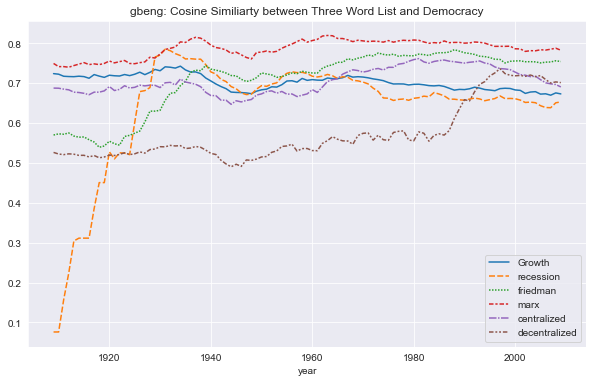

In [52]:
get_cos_plot('gbeng',10)

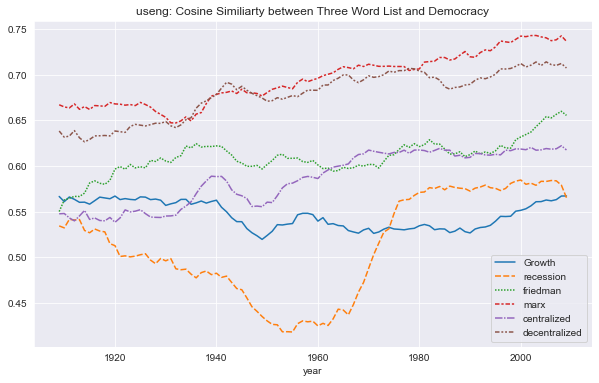

In [55]:
get_cos_plot('useng', 10)

In [ ]:
cd /Users/Administrator/Desktop/UChicago/Y1Q2/CCA2022/democracy/French

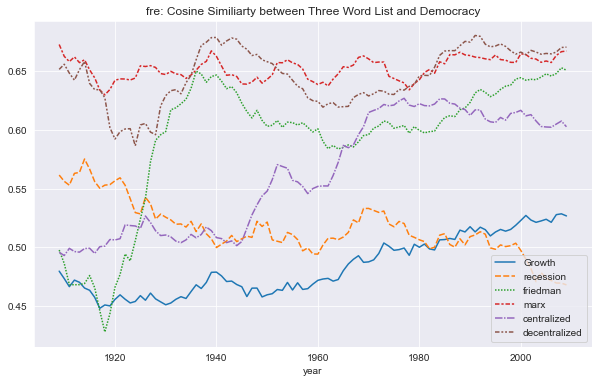

In [7]:
get_cos_plot('fre', 10)

In [4]:
cd /Users/Administrator/Desktop/UChicago/Y1Q2/CCA2022/democracy/german

/Users/Administrator/Desktop/UChicago/Y1Q2/CCA2022/democracy/german


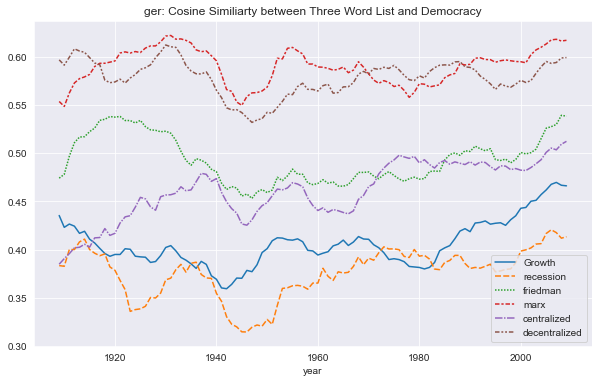

In [5]:
get_cos_plot('ger', 10)

In [8]:
cd /Users/Administrator/Desktop/UChicago/Y1Q2/CCA2022/democracy/italian_word_list

/Users/Administrator/Desktop/UChicago/Y1Q2/CCA2022/democracy/italian_word_list


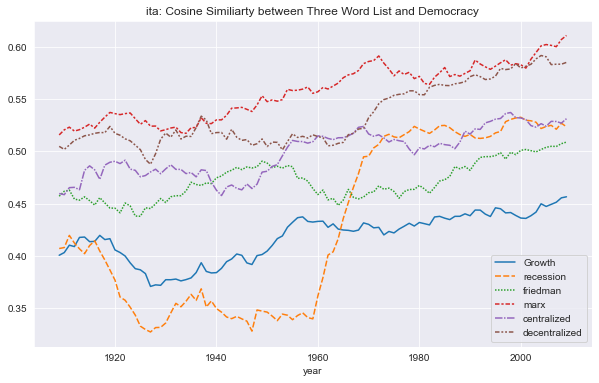

In [10]:
get_cos_plot('ita', 10)

In [10]:
cd /Users/Administrator/Desktop/UChicago/Y1Q2/CCA2022/democracy/Russia

/Users/Administrator/Desktop/UChicago/Y1Q2/CCA2022/democracy/Russia


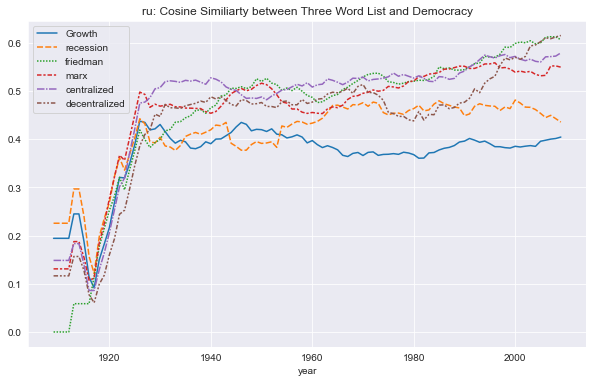

In [11]:
get_cos_plot('ru', 10)

In [11]:
cd /Users/Administrator/Desktop/UChicago/Y1Q2/CCA2022/democracy/Chinese

/Users/Administrator/Desktop/UChicago/Y1Q2/CCA2022/democracy/chinese


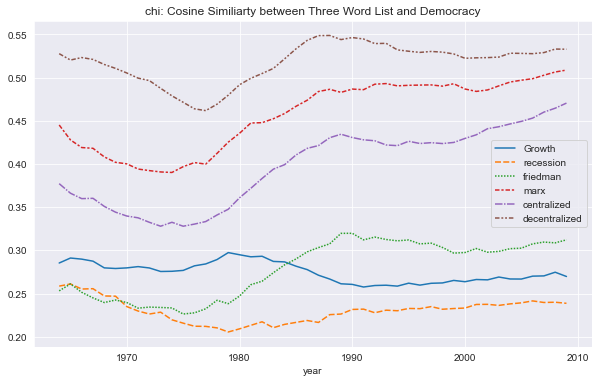

In [13]:
get_cos_plot('chi', 10)

In [25]:
def get_time_series_plot(country_name, gdp_country,n):
    """
    Return a plot of econ words cosine similarity
    and GDP.
    """
    
    for aspect in ['growth', 'recession', 'friedman', 'marx', 'centralized', 'decentralized']:
        # read csv
        econ = pd.read_csv('{}_cos_{}.csv'.format(aspect, country_name), index_col=0)
        # clean data
        econ = clean_df(econ, aspect)
        if aspect == 'growth':
            total = econ
        else:
            total[aspect] = econ[aspect]

    total = total.set_index('year')
    data = pd.read_csv('../{}'.format(gdp_country))
    time_series = total.merge(data, on='year', how='right')
    time_series.set_index('year', inplace=True)
    
    fig, ax = plt.subplots()
    ax.plot(time_series['GDP per capita growth (annual %)'].rolling(n).mean(), color='red', label='GDP')
    ax.tick_params(axis='y', labelcolor='red')
    ax.legend()
    ax2 = ax.twinx()
    ax2.plot(time_series['growth'].rolling(n).mean(), color='green', label='econ cosine')
    ax2.tick_params(axis='y', labelcolor='green')
    ax2.legend()

    plt.legend()
    plt.title('{}: Time Series: GDP per capital growth and Cosine Simiarlity with Econ Words'.format(country_name))
    plt.show()
    

In [39]:
cd /Users/Administrator/Desktop/UChicago/Y1Q2/CCA2022/democracy/America

/Users/Administrator/Desktop/UChicago/Y1Q2/CCA2022/democracy/America


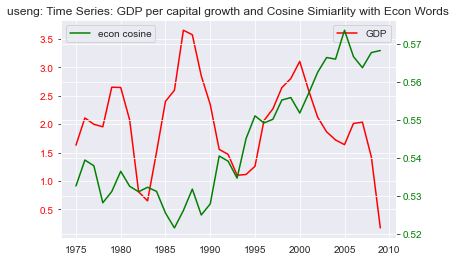

In [40]:
get_time_series_plot('useng', 'engus',5)

In [31]:
cd /Users/Administrator/Desktop/UChicago/Y1Q2/CCA2022/democracy/Great Britain

/Users/Administrator/Desktop/UChicago/Y1Q2/CCA2022/democracy/Great Britain


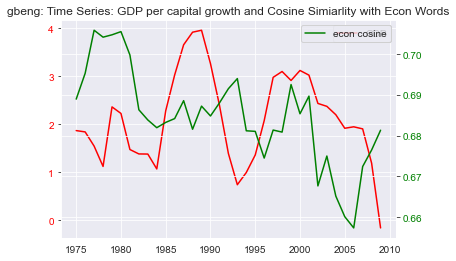

In [36]:
get_time_series_plot('gbeng', 'enggb', 5)

In [41]:
cd /Users/Administrator/Desktop/UChicago/Y1Q2/CCA2022/democracy/French

/Users/Administrator/Desktop/UChicago/Y1Q2/CCA2022/democracy/French


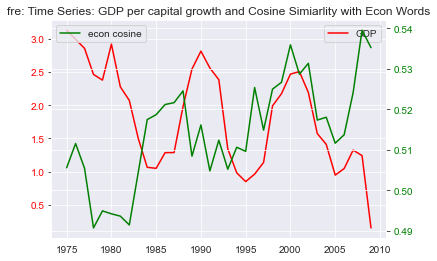

In [42]:
get_time_series_plot('fre', 'fre', 5)

In [44]:
cd /Users/Administrator/Desktop/UChicago/Y1Q2/CCA2022/democracy/german

/Users/Administrator/Desktop/UChicago/Y1Q2/CCA2022/democracy/german


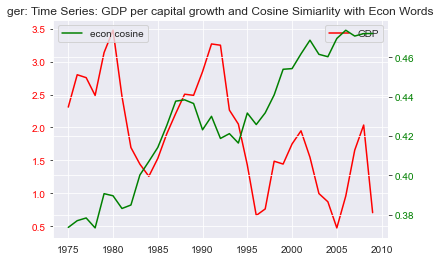

In [45]:
get_time_series_plot('ger', 'ger', 5)

In [48]:
cd /Users/Administrator/Desktop/UChicago/Y1Q2/CCA2022/democracy/russia

/Users/Administrator/Desktop/UChicago/Y1Q2/CCA2022/democracy/Russia


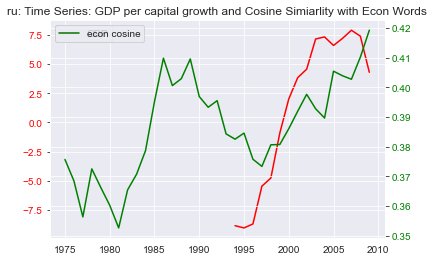

In [51]:
get_time_series_plot('ru', 'russian', 5)

In [53]:
cd /Users/Administrator/Desktop/UChicago/Y1Q2/CCA2022/democracy/italian_word_list

/Users/Administrator/Desktop/UChicago/Y1Q2/CCA2022/democracy/italian_word_list


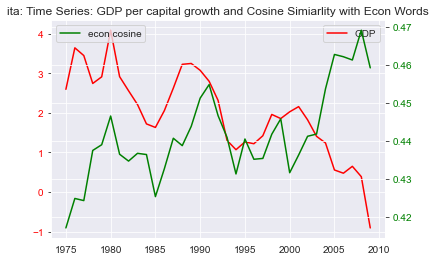

In [54]:
get_time_series_plot('ita','italian', 5)

In [55]:
cd /Users/Administrator/Desktop/UChicago/Y1Q2/CCA2022/democracy/chinese

/Users/Administrator/Desktop/UChicago/Y1Q2/CCA2022/democracy/chinese


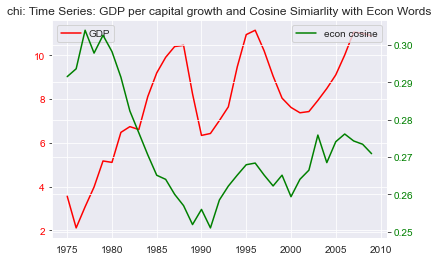

In [56]:
get_time_series_plot('chi', 'chi', 5)

In [273]:
def get_gc_test(country_name, gdp_country, inverse=False, maxlag=5):
    """
    Produce granger causality test results between 
    econ words cosine similarity and GDP.
    By default, test whether econ cosine causes GDP growths.
    If inverse=True, test whether GDP growth causes econ cosine.
    """
    results = pd.DataFrame()
    for aspect in ['growth', 'recession', 'friedman', 'marx', 'centralized', 'decentralized']:
        # read csv
        econ = pd.read_csv('{}_cos_{}.csv'.format(aspect, country_name), index_col=0)
        # clean data
        econ = clean_df(econ, aspect)
        if aspect == 'growth':
            total = econ
        else:
            total[aspect] = econ[aspect]
    
    
    total = total.set_index('year')
    data = pd.read_csv('../{}'.format(gdp_country))
    time_series = total.merge(data, on='year', how='right')
    time_series.set_index('year', inplace=True)
#     print(time_series.columns)
#     for aspect in ['growth', 'recession', 'friedman', 'marx', 'centralized', 'decentralized']:
    index = [] 
    cols = []
    country = pd.DataFrame(index = [1, 2, 3, 4, 5])
    for aspect in ['growth', 'recession', 'friedman', 'marx', 'centralized', 'decentralized']:
        time_series_1 = time_series.loc[:, ['GDP per capita growth (annual %)', aspect]].dropna()

        a1=np.array(time_series_1['GDP per capita growth (annual %)'].pct_change().dropna())
        a2=np.array(time_series_1[aspect].pct_change().dropna())
         
        index = [1, 2, 3, 4, 5]
        df = pd.DataFrame(index=index, columns = ['ssr_ftest'+'_'+aspect, 'ssr_chi2test''_'+aspect, 
                                                  'lrtest''_'+aspect, 'params_ftest''_'+aspect])
        if inverse:
            for i,j in grangercausalitytests(np.vstack((a2, a1)).T, maxlag=maxlag).items():
                index.append(i)
        
        else:
            for i,j in grangercausalitytests(np.vstack((a1, a2)).T, maxlag=maxlag).items():
                row = [] 
                #print(i,j)
#                 df = pd.DataFrame()
            
#                 cols = j[0].keys()
#                 print(cols)
#                 df.columns = list(cols)
#                 if i not in df: 
#                     df[i] = []
                for k in j[0].values(): 
                    row.append((k[0].round(3), k[1].round(3)))
                
                df.loc[i] = row
                df.style.set_caption(aspect)
#                 print(pd.DataFrame(df.items(), columns = cols))
                #print(j[0].values())
#                 print(df, row)    
                
                #print(df)
        #country.join(df, how = 'outer')
        country = pd.concat([country, df], axis = 1)
#         country=country
#         print(index,list(cols))
                
        
   
    country.to_csv('./{} causality'.format(country_name))
#     return None

In [288]:
cd /Users/Administrator/Desktop/UChicago/Y1Q2/CCA2022/democracy/chinese

/Users/Administrator/Desktop/UChicago/Y1Q2/CCA2022/democracy/chinese


In [289]:
get_gc_test('chi', 'chi', inverse=False, maxlag=5)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0137  , p=0.9074  , df_denom=34, df_num=1
ssr based chi2 test:   chi2=0.0150  , p=0.9027  , df=1
likelihood ratio test: chi2=0.0150  , p=0.9027  , df=1
parameter F test:         F=0.0137  , p=0.9074  , df_denom=34, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.0363  , p=0.0625  , df_denom=31, df_num=2
ssr based chi2 test:   chi2=7.0521  , p=0.0294  , df=2
likelihood ratio test: chi2=6.4401  , p=0.0400  , df=2
parameter F test:         F=3.0363  , p=0.0625  , df_denom=31, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.8190  , p=0.1666  , df_denom=28, df_num=3
ssr based chi2 test:   chi2=6.8214  , p=0.0778  , df=3
likelihood ratio test: chi2=6.2321  , p=0.1008  , df=3
parameter F test:         F=1.8190  , p=0.1666  , df_denom=28, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.6264  , p=0.6481  , df_d

In [298]:
cd /Users/Administrator/Desktop/UChicago/Y1Q2/CCA2022/democracy/America

/Users/Administrator/Desktop/UChicago/Y1Q2/CCA2022/democracy/America


In [305]:
def get_time_series_plot(country_name, gdp_country):
    """
    Return the pearson correlation between
    three word lists' cosine similarity and GDP.
    """
    
    for aspect in ['growth', 'recession', 'friedman', 'marx', 'centralized', 'decentralized']:
        # read csv
        econ = pd.read_csv('{}_cos_{}.csv'.format(aspect, country_name), index_col=0)
        # clean data
        econ = clean_df(econ, aspect)
        if aspect == 'growth':
            total = econ
        else:
            total[aspect] = econ[aspect]

    total = total.set_index('year')
    data = pd.read_csv('../{}'.format(gdp_country))
    time_series = total.merge(data, on='year', how='right')
    time_series.set_index('year', inplace=True)
    if country_name == 'ru':
        time_series.dropna(inplace=True)
    
    corr1, p1 = pearsonr(time_series['GDP per capita growth (annual %)'], time_series['growth'])
    corr2, p2 = pearsonr(time_series['GDP per capita growth (annual %)'], time_series['recession'])
    corr3, p3 = pearsonr(time_series['GDP per capita growth (annual %)'], time_series['friedman'])
    corr4, p4 = pearsonr(time_series['GDP per capita growth (annual %)'], time_series['marx'])
    corr5, p5 = pearsonr(time_series['GDP per capita growth (annual %)'], time_series['centralized'])
    corr6, p6 = pearsonr(time_series['GDP per capita growth (annual %)'], time_series['decentralized'])
    
    
    country = pd.DataFrame({'correlation': [corr1, corr2, corr3, corr4, corr5, corr6],
                         'p-value': [p1, p2, p3, p4, p5, p6]}, 
                        index=['growth', 'recession', 'friedman', 'marx', 'centralized', 'decentralized'])
    country.to_csv('./{} correlation'.format(country_name))
    
    return country

In [316]:
cd /Users/Administrator/Desktop/UChicago/Y1Q2/CCA2022/democracy/French

/Users/Administrator/Desktop/UChicago/Y1Q2/CCA2022/democracy/French


In [317]:
get_time_series_plot('fre', 'fre')

,correlation,p-value
growth,0.075449,0.648030
recession,0.125420,0.446790
friedman,-0.167611,0.307769
marx,-0.148718,0.366226
centralized,0.059096,0.720821
decentralized,-0.078508,0.634739
